In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
header = pd.read_csv('./Header.csv')
# 처음부터 다시 데이터를 만들 것인가?
New_load_DB = False

if New_load_DB:
    for _ in os.listdir('./Total_DB/'):
        DB = pd.DataFrame(np.loadtxt('./Total_DB/{}'.format(_), delimiter=';', usecols=range(168)), columns=header.columns)
        header = pd.concat((header, DB))
else:
    header = pd.DataFrame(pd.read_csv('tot_db.csv'), columns=header.columns)

In [3]:
des = header.describe()
des

,BFV122,BHV1,BHV101,BHV108,BHV2,BHV208,BHV22,BHV3,BHV308,BHV311,...,ZSGW1,ZSGW2,ZSGW3,FSRMDPM,USUBMA,ZINST1,ZINST17,ZINST2,ZINST3,ZINST46
count,244982.000000,244982.000000,244982.0,244982.000000,244982.000000,244982.000000,244982.000000,244982.0,244982.000000,244982.000000,...,244982.000000,244982.000000,244982.000000,2.449820e+05,244982.000000,244982.000000,244982.000000,244982.000000,244982.000000,244982.000000
mean,0.026071,0.045728,0.0,0.093922,0.045728,0.093922,0.498314,0.0,0.093922,0.973101,...,6.951259,6.779299,6.441462,-2.926887e+02,24.804459,4.273166,0.597258,-8.608793,0.947179,240.628243
std,0.123582,0.207692,0.0,0.290862,0.207692,0.290862,0.499708,0.0,0.290862,0.093690,...,2.707714,2.714360,2.343627,2.772152e+04,34.091013,19.711357,0.727222,2.146046,1.384936,48.185374
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,-0.440000,-0.780000,-0.560000,-4.988283e+06,-6.730000,0.000000,0.000000,-11.000000,0.000000,51.330000
25%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.960000,...,4.940000,4.890000,4.930000,-3.000000e-01,-0.650000,0.000000,0.000000,-11.000000,0.000000,218.582500
50%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,1.000000,...,6.010000,6.060000,5.630000,-2.000000e-02,10.550000,0.000000,0.330000,-8.810000,0.000000,259.070000
75%,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,1.000000,...,8.650000,8.380000,7.550000,-0.000000e+00,39.930000,0.020000,0.890000,-7.010000,1.920000,268.380000
max,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,18.750000,15.600000,13.630000,5.210000e+00,200.280000,103.170000,4.390000,-3.340000,4.350000,326.200000


In [4]:
Tot_minmax = des.loc[['min', 'max']] # 전체 변수에 대한 minmax값
Tot_minmax

,BFV122,BHV1,BHV101,BHV108,BHV2,BHV208,BHV22,BHV3,BHV308,BHV311,...,ZSGW1,ZSGW2,ZSGW3,FSRMDPM,USUBMA,ZINST1,ZINST17,ZINST2,ZINST3,ZINST46
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.44,-0.78,-0.56,-4988283.00,-6.73,0.00,0.00,-11.00,0.00,51.33
max,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,18.75,15.60,13.63,5.21,200.28,103.17,4.39,-3.34,4.35,326.20


In [5]:
# MinmaxScaler를 활용한 노멀라이제이션
scaler = MinMaxScaler()
scaler.fit(Tot_minmax)
norm_db = scaler.transform(header.values)
norm_db.shape

(244982, 168)

In [6]:
norm_db = pd.DataFrame(norm_db, columns=header.columns)
norm_db.head()

,BFV122,BHV1,BHV101,BHV108,BHV2,BHV208,BHV22,BHV3,BHV308,BHV311,...,ZSGW1,ZSGW2,ZSGW3,FSRMDPM,USUBMA,ZINST1,ZINST17,ZINST2,ZINST3,ZINST46
0,0.58,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.96,...,0.690985,0.830891,0.943622,0.999999,0.120622,0.967045,0.0,0.998695,0.0,0.997854
1,0.57,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.96,...,0.690985,0.830891,0.943622,0.999999,0.120526,0.966754,0.0,0.998695,0.0,0.997926
2,0.58,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.96,...,0.690985,0.830281,0.942918,0.999999,0.121105,0.969759,0.0,0.998695,0.0,0.997599
3,0.58,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.96,...,0.690985,0.830281,0.942918,0.999999,0.120815,0.970243,0.0,0.998695,0.0,0.997417
4,0.58,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.96,...,0.690985,0.830281,0.943622,0.999999,0.120960,0.969177,0.0,0.998695,0.0,0.997490


In [7]:
all_db_load = True

# 선택할 변수 선정
input_value = ['BHV311', 'BPSV10', 'BPSV5', 'BV102', 'BV202', 'BV302', 'KCHRGP1', 'KCHRGP3', 'KCTMTSP', 'KLAMPO121',
               'KLAMPO123', 'KLAMPO47', 'KSWO125', 'WPRZSV', 'ZSGW1', 'ZSGW2', 'ZSGW3', 'KBCDO23', 'KZBANK1', 'KZBANK2', 
               'KZBANK3', 'KZBANK4', 'KZBANK5', 'KZBANK6', 'KZBANK7', 'KZBANK8', 'QPROREL', 'QPRZB', 'QPRZP', 'UAVLEG1', 
               'UAVLEG2', 'UAVLEG3', 'UAVLEGM', 'UCOLEG1', 'UCOLEG2', 'UCOLEG3', 'UHOLEG1', 'UHOLEG2', 'UHOLEG3', 'WACCA', 
               'WACCB', 'WHV22', 'WSPRAY', 'WSPRCS1', 'WSPRCS2', 'WSTM1', 'WSTM2', 'WSTM3', 'ZINST101', 'ZINST22', 'ZINST25', 
               'ZINST26', 'ZINST42', 'ZINST56', 'ZINST57', 'ZINST58', 'ZINST62', 'ZINST65', 'ZINST66', 'ZINST70', 'ZINST71', 
               'ZINST72', 'ZINST73', 'ZINST74', 'ZINST75', 'ZINST76', 'ZINST77', 'ZINST78', 'ZINST89', 'ZINST91', 'ZINST92', 
               'ZINST93', 'ZINST94', 'ZINST95', 'ZINST96', 'ZINST99', 'ZPRZ', 'ZREAC']
output_value = ['BFV122', 'BHV1', 'BHV108', 'BHV2', 'BHV208', 'BHV22', 'BHV308', 'BHV6', 'BLV459', 'BLV614',
                'BLV615', 'BPORV', 'BPRZSP', 'BV101', 'BV201', 'BV301', 'KAFWP1', 'KAFWP2', 'KAFWP3', 'KBHON',
                'KCHRGP2', 'KCISOA', 'KFWP1', 'KFWP2', 'KFWP3', 'KLAMPO122', 'KLAMPO124', 'KLAMPO125', 'KLAMPO126',
                'KLAMPO2', 'KLAMPO4', 'KLAMPO48', 'KLAMPO49', 'KLAMPO50', 'KMSISO', 'KOHV22', 'KOLV615', 'KPBHM',
                 'KRXTRIP', 'KSWO120']

input_length = 10
Norm_DB_input_train_DB = []
Norm_DB_output_train_DB = []

Norm_DB_input_test_DB = []
Norm_DB_output_test_DB = []

for _ in os.listdir('./Train_DB/'):
    #단일 데이터 읽어 오기
    DB = pd.DataFrame(np.loadtxt('./Train_DB/{}'.format(_), delimiter=';', usecols=range(168)), columns=header.columns)
    Norm_DB = pd.DataFrame(scaler.transform(DB.values), columns=header.columns)

    # 데이터 분할
    Norm_DB_input = Norm_DB[input_value]
    Norm_DB_output = Norm_DB[output_value]
    
    # 10개 시간 스텝으로 분할하여 저장
    for i in range(0, Norm_DB_input.shape[0] - input_length -1):
        # input DB
        Seqence_data = Norm_DB_input.iloc[i : i + input_length].values
        Norm_DB_input_train_DB.append(Seqence_data)
        # output DB
        Seqence_data = Norm_DB_output.iloc[i + input_length + 1].values
        Norm_DB_output_train_DB.append(Seqence_data)
        
    # 테스트용 break
    if not all_db_load:
        print('단일 데이터만 읽었습니다.')
        break
        
for _ in os.listdir('./Test_DB/'):
    #단일 데이터 읽어 오기
    DB = pd.DataFrame(np.loadtxt('./Test_DB/{}'.format(_), delimiter=';', usecols=range(168)), columns=header.columns)
    Norm_DB = pd.DataFrame(scaler.transform(DB.values), columns=header.columns)

    # 데이터 분할
    Norm_DB_input = Norm_DB[input_value]
    Norm_DB_output = Norm_DB[output_value]
    
    # 10개 시간 스텝으로 분할하여 저장
    for i in range(0, Norm_DB_input.shape[0] - input_length -1):
        # input DB
        Seqence_data = Norm_DB_input.iloc[i : i + input_length].values
        Norm_DB_input_test_DB.append(Seqence_data)
        # output DB
        Seqence_data = Norm_DB_output.iloc[i + input_length + 1].values
        Norm_DB_output_test_DB.append(Seqence_data)
        
    # 테스트용 break
    if not all_db_load:
        print('단일 데이터만 읽었습니다.')
        break

In [9]:
np.shape(Norm_DB_output_train_DB)

(235654, 40)

In [12]:
import tensorflow as tf
import numpy as np

Shape_trina_DB = np.shape(Norm_DB_input_train_DB) # (None, 10, 78)

input_layer = tf.keras.Input(batch_shape=(None, Shape_trina_DB[1], Shape_trina_DB[2]))
L_model = tf.keras.models.Sequential([
    tf.keras.layers.CuDNNLSTM(64, return_sequences=True),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.CuDNNLSTM(64),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(32),
    tf.keras.layers.Dropout(0.3)
])

model = L_model(input_layer)

out_layer = []
# on/off 변수 출력 레이어
for i in range(0,1):
    out_layer.append(tf.keras.layers.Dense(40)(model))

fin_model = tf.keras.Model(inputs=input_layer, outputs=out_layer)

fin_model.summary()

fin_model.compile(loss="mean_squared_error", optimizer="adam", metrics=["accuracy"])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 10, 78)            0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 32)                72224     
_________________________________________________________________
dense_3 (Dense)              (None, 40)                1320      
Total params: 73,544
Trainable params: 73,544
Non-trainable params: 0
_________________________________________________________________


In [126]:
tot_out_ = []

for training_step in range(0, 3):
    print('{} step======================================'.format(training_step))
    # 1 step 훈련
    hist = fin_model.fit([Norm_DB_input_train_DB], [Norm_DB_output_train_DB], epochs=1, batch_size=500, verbose = 1)
    # 1 step 훈련 후 검증 데이터를 통한 검증후 저장
    tot_out_.append(fin_model.predict([Norm_DB_input_test_DB]))

0 step======================================
Epoch 1/1
235654/235654 [==============================] - 6s 23us/step - loss: 0.0164 - acc: 0.1230
1 step======================================
Epoch 1/1
235654/235654 [==============================] - 5s 22us/step - loss: 0.0157 - acc: 0.1316
2 step======================================
Epoch 1/1
235654/235654 [==============================] - 6s 24us/step - loss: 0.0153 - acc: 0.1412


Start 0 Step


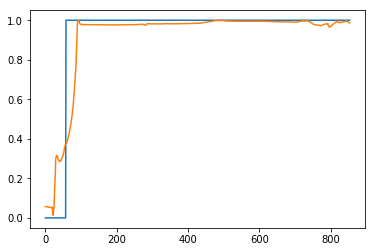

Start 1 Step


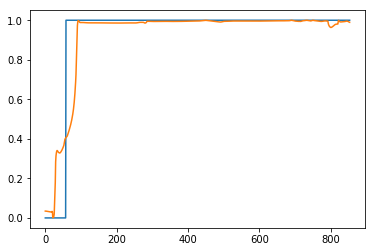

Start 2 Step


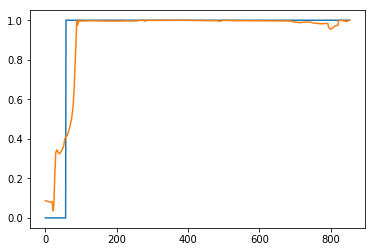

In [127]:
def change_value(x):
    if x > 1:
        return abs(2 - x)
    elif x < 0:
        return abs(x)
    else:
        return x
    
for step in range(len(tot_out_)):

    print('Start {} Step'.format(step))
    out_ = tot_out_[step]
    output_value = ['BFV122', 'BHV1', 'BHV108', 'BHV2', 'BHV208', 'BHV22', 'BHV308', 'BHV6', 'BLV459', 'BLV614',
                'BLV615', 'BPORV', 'BPRZSP', 'BV101', 'BV201', 'BV301', 'KAFWP1', 'KAFWP2', 'KAFWP3', 'KBHON',
                'KCHRGP2', 'KCISOA', 'KFWP1', 'KFWP2', 'KFWP3', 'KLAMPO122', 'KLAMPO124', 'KLAMPO125', 'KLAMPO126',
                'KLAMPO2', 'KLAMPO4', 'KLAMPO48', 'KLAMPO49', 'KLAMPO50', 'KMSISO', 'KOHV22', 'KOLV615', 'KPBHM',
                 'KRXTRIP', 'KSWO120']
    out_value = pd.DataFrame(out_, columns=output_value)

    ## 1보다 큰 변수와 0보다 작은 변수들을 재처리
    for _ in out_value.columns:
        out_value[_] = out_value[_].apply(change_value)
    

    # CSV 파일로 출력
    out_value.to_csv('./Out_Result_DB/{}Step_result.csv'.format(step))

    # Matplotlib 그래프로 호출
    plt.plot(Norm_DB_output_test_DB['KAFWP2'])
    plt.plot(out_value['KAFWP2'])
    plt.show()